In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

# Data Cleaning

In [ ]:
chunk_size = 100000

csv_chunks = pd.read_csv('US_Accidents_March23.csv', chunksize=chunk_size)

all_chunks = [] 
for i, chunk in enumerate(csv_chunks):

    cols_to_keep = ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 
                    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 
                    'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']

    df = chunk[cols_to_keep]
    df = df.fillna(0)

    all_chunks.append(df)

    if i == 5:
        break
df = pd.concat(all_chunks)

In [ ]:
data = pd.get_dummies(df, drop_first=True, dtype=np.int64)
X = data.drop(columns=['Severity'])
y = data['Severity']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Random Forest

In [ ]:
# Initialize and fit the forest
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)

# Print the oob_score
print(rf.oob_score_)

# Extract the feature importances of the forest
feature_importances = rf.feature_importances_
feature_names = X.columns

features = sorted(zip(feature_importances, feature_names))


print(f'Best Features {features[-3:]}')
print(f'Worst Features {features[:3]}')

0.64155
Best Features [(0.23127567620511882, 'Humidity(%)'), (0.23416474220622058, 'Temperature(F)'), (0.24698957112273243, 'Pressure(in)')]
Worst Features [(0.0, 'Weather_Condition_Blowing Dust / Windy'), (0.0, 'Weather_Condition_N/A Precipitation'), (3.6009444546019085e-07, 'Weather_Condition_Light Rain Shower')]


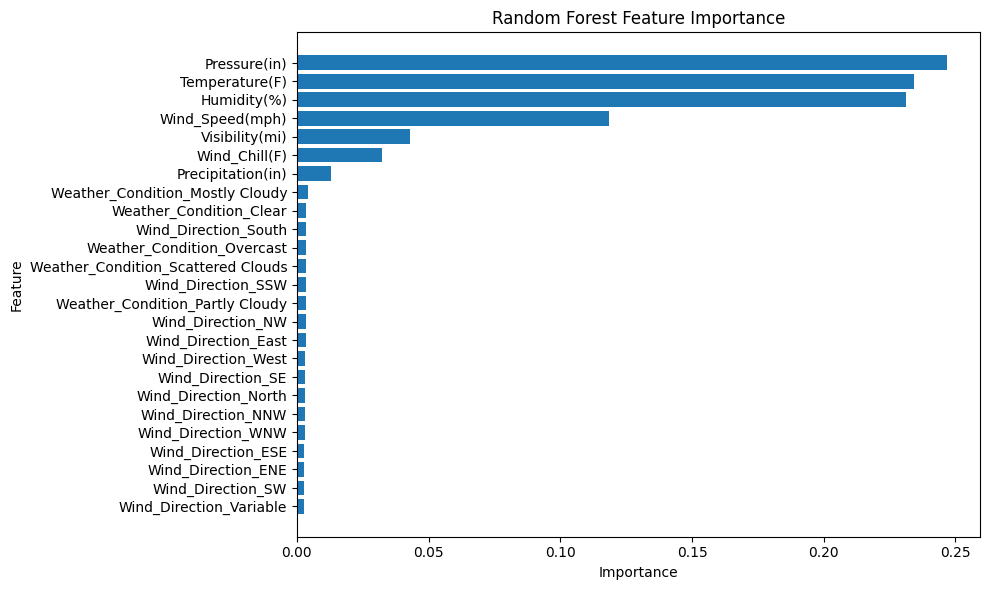

In [ ]:
importances = rf.feature_importances_
k = len(importances) // 4
indices = np.argsort(importances)[-k:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

In [ ]:
# # Decide what values of max_depth and max_features to search over
# max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# max_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# best_oob_score = 0
# best_params = None



# # Perform a grid search to find the best parameters
# for max_depth in max_depths:
#   for mf in max_features:
#     # Initialize and fit the forest
#     rf = RandomForestClassifier(oob_score=True, max_depth=max_depth, max_features=mf)
#     rf.fit(X_train, y_train)
      
      
#     # Compare the oob_score to your best oob_score and store the parameters if better
#     if best_oob_score < rf.oob_score_:
#       best_oob_score = rf.oob_score_
#       best_params = max_depth, mf

# # Print the best oob score and the hyperparameters you used to get it
# print(best_oob_score)
# print(best_params)

# Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.63114


In [ ]:
# Extract the feature importances of the forest
feature_importances = gb.feature_importances_
feature_names = X.columns

features = sorted(zip(feature_importances, feature_names))


print(f'Best Features {features[-3:]}')
print(f'Worst Features {features[:3]}')

Best Features [(0.14911799210053492, 'Pressure(in)'), (0.20744314114135623, 'Humidity(%)'), (0.24328906550732188, 'Temperature(F)')]
Worst Features [(0.0, 'Weather_Condition_Blowing Dust / Windy'), (0.0, 'Weather_Condition_Blowing Sand'), (0.0, 'Weather_Condition_Blowing Snow')]


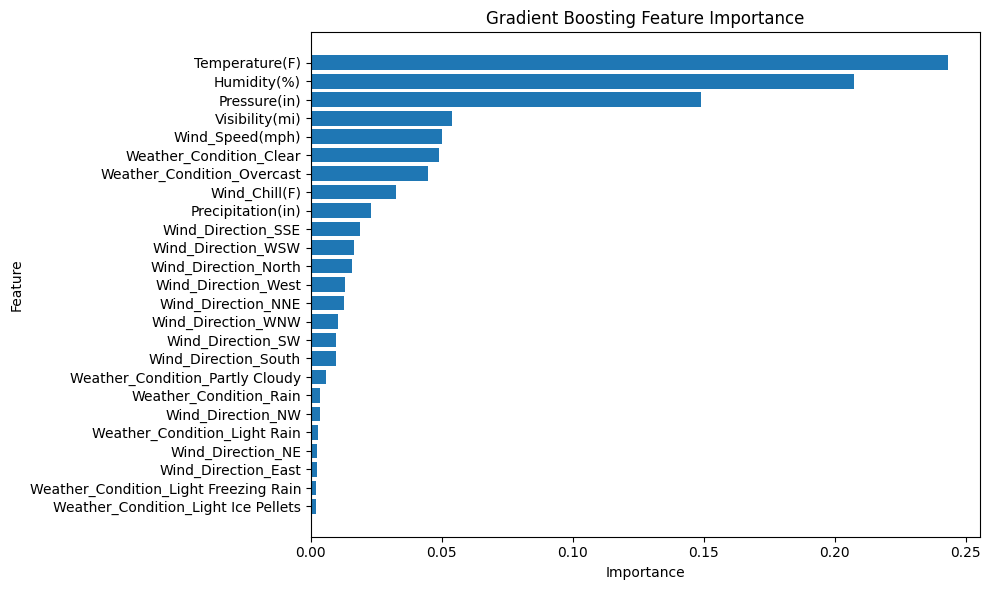

In [ ]:
importances = gb.feature_importances_
k = len(importances) // 4
indices = np.argsort(importances)[-k:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

# Bagging

In [ ]:
bc = BaggingClassifier()

bc.fit(X_train, y_train)
accuracy = bc.score(X_test, y_test)
print(accuracy)

0.63402


In [ ]:
# Extract the feature importances of the forest
feature_importances = bc.feature_importances_
feature_names = X.columns

features = sorted(zip(feature_importances, feature_names))


print(f'Best Features {features[-3:]}')
print(f'Worst Features {features[:3]}')

AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'